In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
small=pd.read_csv('/content/AO Related Survey - Small Companies New.csv')

In [87]:
small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Industry      278 non-null    object
 1   CV_Sorting    31 non-null     object
 2   Difficult     26 non-null     object
 3   Contacted     23 non-null     object
 4   Benefits_AOP  19 non-null     object
 5   Know_MC       22 non-null     object
 6   Remark        15 non-null     object
dtypes: object(7)
memory usage: 15.3+ KB


In [88]:
small.head()

,Industry,CV_Sorting,Difficult,Contacted,Benefits_AOP,Know_MC,Remark
0,Information Technology (IT),Bdjobs,No,Yes,Not Much,Yes,NaN
1,Information Technology (IT),Bdjobs,NaN,NaN,NaN,NaN,NaN
2,Information Technology (IT),Bdjobs,Yes,Yes,Not Much,No,NaN
3,Garments/ Textile,Manually,Yes,No,Not Much,No,NaN
4,Information Technology (IT),Bdjobs,No,Yes,Not Much,No,Can not find appropriate candidate. Had to use...


In [89]:
small=small.dropna(thresh=2)

In [90]:
small['Size']='Small'

In [91]:
small.head()

,Industry,CV_Sorting,Difficult,Contacted,Benefits_AOP,Know_MC,Remark,Size
0,Information Technology (IT),Bdjobs,No,Yes,Not Much,Yes,NaN,Small
1,Information Technology (IT),Bdjobs,NaN,NaN,NaN,NaN,NaN,Small
2,Information Technology (IT),Bdjobs,Yes,Yes,Not Much,No,NaN,Small
3,Garments/ Textile,Manually,Yes,No,Not Much,No,NaN,Small
4,Information Technology (IT),Bdjobs,No,Yes,Not Much,No,Can not find appropriate candidate. Had to use...,Small


In [92]:
big=pd.read_csv('/content/AO Related Survey - Big Companies (1).csv')
medium=pd.read_csv('/content/AO Related Survey - Medium Companies (1).csv')

In [93]:
big=big.dropna(thresh=2)
medium=medium.dropna(thresh=2)

In [94]:
medium['Size']='Medium'
big['Size']='Big'

In [95]:
all=pd.concat([small,medium,big])

In [96]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 140
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Industry      82 non-null     object
 1   CV_Sorting    81 non-null     object
 2   Difficult     75 non-null     object
 3   Contacted     70 non-null     object
 4   Benefits_AOP  64 non-null     object
 5   Know_MC       67 non-null     object
 6   Remark        25 non-null     object
 7   Size          82 non-null     object
 8   Remarks       4 non-null      object
dtypes: object(9)
memory usage: 6.4+ KB


In [97]:
len(big)+len(medium)+len(small)

82

In [98]:
all.reset_index(inplace=True)

In [99]:
all[all['Remarks'].notnull()]

,index,Industry,CV_Sorting,Difficult,Contacted,Benefits_AOP,Know_MC,Remark,Size,Remarks
33,7,Hospital/ Diagnostic Center,Manually,No,No,Yes,No,NaN,Medium,"Totally mis-communication, thinks AO is paid a..."
34,8,Manufacturing (Heavy Industry),Bdjobs,No,Yes,No,Yes,NaN,Medium,Lower number of applicants for blue collar job...
36,19,Garments/ Textile,Bdjobs,No,Yes,Preference,No,NaN,Medium,Needs to be contacted in regard of new service...
42,130,Bank/ Non-Bank Fin. Institution,Bdjobs,No,Yes,No,Yes,NaN,Medium,"more customized barrier, can get right applica..."


In [100]:
all.loc[33, 'Remark'] = all.iloc[33]['Remarks']

In [101]:
all.loc[34, 'Remark'] = all.iloc[34]['Remarks']
all.loc[36, 'Remark'] = all.iloc[36]['Remarks']
all.loc[42, 'Remark'] = all.iloc[42]['Remarks']

In [102]:
all.iloc[42]

index                                                         130
Industry                          Bank/ Non-Bank Fin. Institution
CV_Sorting                                                 Bdjobs
Difficult                                                      No
Contacted                                                     Yes
Benefits_AOP                                                   No
Know_MC                                                       Yes
Remark          more customized barrier, can get right applica...
Size                                                       Medium
Remarks         more customized barrier, can get right applica...
Name: 42, dtype: object

In [103]:
all.drop(['Remarks'],axis=1,inplace=True)

In [104]:
all.head()

,index,Industry,CV_Sorting,Difficult,Contacted,Benefits_AOP,Know_MC,Remark,Size
0,0,Information Technology (IT),Bdjobs,No,Yes,Not Much,Yes,NaN,Small
1,1,Information Technology (IT),Bdjobs,NaN,NaN,NaN,NaN,NaN,Small
2,2,Information Technology (IT),Bdjobs,Yes,Yes,Not Much,No,NaN,Small
3,3,Garments/ Textile,Manually,Yes,No,Not Much,No,NaN,Small
4,4,Information Technology (IT),Bdjobs,No,Yes,Not Much,No,Can not find appropriate candidate. Had to use...,Small


In [105]:
all['Remark'].value_counts()

Non-serious candidates, candidate review system                                                                                                     2
more customized barrier, can get right applicants to apply                                                                                          2
Can not find appropriate candidate. Had to use other sources because of reduced number of applicants.                                               1
Totally mis-communication, thinks AO is paid and bdjobs resume is not as updated as customized cv.                                                  1
matching is easy to sort, less irrelevant applications                                                                                              1
matching is not effective                                                                                                                           1
matching is useless                                                                                 

In [106]:
all.groupby('Size')['Difficult'].value_counts()

Size    Difficult   
Big     no              15
        yes              8
        No               3
        Confidential     1
        Yes              1
Medium  No              18
        no               3
Small   No              23
        Yes              3
Name: Difficult, dtype: int64

In [107]:
all['Difficult'].str.upper()

0      NO
1     NaN
2     YES
3     YES
4      NO
     ... 
77    YES
78     NO
79     NO
80     NO
81    YES
Name: Difficult, Length: 82, dtype: object

In [108]:
for i in all['Difficult']:
  if i == 'yes':
    all['Difficult'].replace(i, 'Yes',inplace=True)
  elif i == 'no':
        all['Difficult'].replace(i,'No',inplace=True)


In [109]:
all['Difficult'].value_counts()

No              62
Yes             12
Confidential     1
Name: Difficult, dtype: int64

In [110]:

for i in all['Contacted']:
    if i == 'yes':
        all['Contacted'].replace(i, 'Yes', inplace=True)
    elif i == 'no':
        all['Contacted'].replace(i, 'No', inplace=True)

In [111]:

for i in all['Know_MC']:
    if i == 'yes':
        all['Know_MC'].replace(i, 'Yes', inplace=True)
    elif i == 'no':
        all['Know_MC'].replace(i, 'No', inplace=True)

In [112]:
all['Know_MC'].value_counts()

Yes                    45
No                     19
yes, but basic          1
yes but our system      1
yes                     1
Name: Know_MC, dtype: int64

In [113]:
all['Contacted'].value_counts()

Yes    55
No     15
Name: Contacted, dtype: int64

In [114]:
all[all['Know_MC']!='Yes']

,index,Industry,CV_Sorting,Difficult,Contacted,Benefits_AOP,Know_MC,Remark,Size
1,1,Information Technology (IT),Bdjobs,NaN,NaN,NaN,NaN,NaN,Small
2,2,Information Technology (IT),Bdjobs,Yes,Yes,Not Much,No,NaN,Small
3,3,Garments/ Textile,Manually,Yes,No,Not Much,No,NaN,Small
4,4,Information Technology (IT),Bdjobs,No,Yes,Not Much,No,Can not find appropriate candidate. Had to use...,Small
5,5,E-commerce/F-commerce,NaN,NaN,NaN,NaN,NaN,"Price increased, now using paper advertisement...",Small
6,6,Others,Download,No,No,Not Much,No,A notification system from LinkedIn to notify ...,Small
7,22,Garments/ Textile,Manually,NaN,No,Not Much,No,NaN,Small
10,30,Electronics/ Consumer Durables,Bdjobs,NaN,NaN,NaN,NaN,NaN,Small
11,34,Architecture/ Engineering/ Construction,Manually,No,NaN,NaN,No,NaN,Small
12,35,Garments/ Textile,Bdjobs,No,Yes,NaN,No,NaN,Small


In [115]:
all.loc[51,'Know_MC']='Yes'

In [116]:
all.loc[52,'Know_MC']='Yes'
all.loc[78,'Know_MC']='Yes'

<Axes: ylabel='Know_MC'>

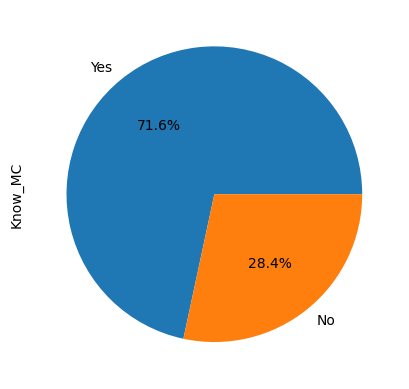

In [133]:
all['Know_MC'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='Contacted'>

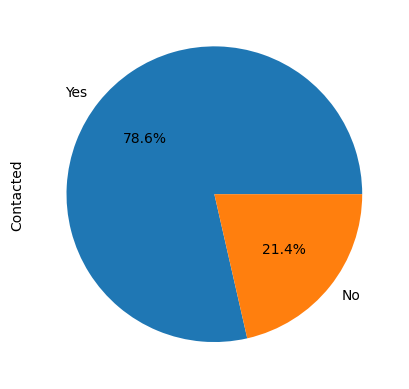

In [201]:
all['Contacted'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [118]:
all['Benefits_AOP'].value_counts()

No                      18
Preference              13
no                      12
Not Much                 7
yes                      7
Yes                      2
No                       1
Not much                 1
company policy           1
policy                   1
we keep options open     1
Name: Benefits_AOP, dtype: int64

In [126]:
for i in all['Benefits_AOP']:
  if i == 'no':
    all['Benefits_AOP'].replace(i,'No',inplace=True)
  elif i == 'Not much':
    all['Benefits_AOP'].replace(i,'Not Much',inplace=True)
  elif i == 'yes':
    all['Benefits_AOP'].replace(i,'Yes',inplace=True)
  elif i == 'company policy':
    all['Benefits_AOP'].replace(i,'Preference',inplace=True)
  elif i == 'policy':
    all['Benefits_AOP'].replace(i,'Preference',inplace=True)
  elif i == 'we keep options open':
    all['Benefits_AOP'].replace(i,'Preference',inplace=True)

In [127]:
all['Benefits_AOP'].value_counts()

No                 30
Preference         14
Yes                 9
Not Much            8
No                  1
company policy      1
policy              1
Name: Benefits_AOP, dtype: int64

In [138]:
all['Benefits_AOP'].str.strip().value_counts()

No                31
Preference        14
Yes                9
Not Much           8
company policy     1
policy             1
Name: Benefits_AOP, dtype: int64

In [142]:
all.loc[51,'Benefits_AOP']='Preference'
all.loc[52,'Benefits_AOP']='Preference'

In [146]:
all['Benefits_AOP']=all['Benefits_AOP'].str.strip()

<Axes: ylabel='Benefits_AOP'>

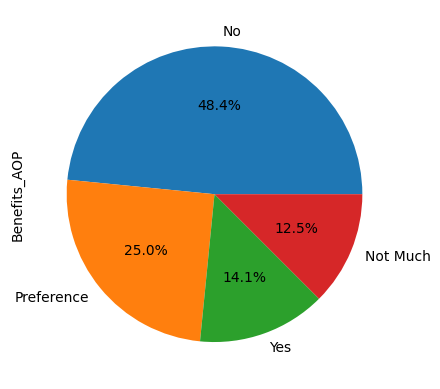

In [150]:
all['Benefits_AOP'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [152]:
all.groupby('Size')['CV_Sorting'].value_counts()

Size    CV_Sorting                                       
Big     Manually                                             15
        Bdjobs                                               10
        ATS                                                   4
Medium  Bdjobs                                               13
        Manually                                              4
        experience above 3 years + University + Keywords      2
        ATS                                                   1
        experience , our system                               1
Small   Bdjobs                                               21
        Manually                                              6
        ATS                                                   3
        Download                                              1
Name: CV_Sorting, dtype: int64

In [153]:
all['CV_Sorting'].value_counts()

Bdjobs                                               44
Manually                                             25
ATS                                                   8
experience above 3 years + University + Keywords      2
Download                                              1
experience , our system                               1
Name: CV_Sorting, dtype: int64

In [159]:
all.loc[50,'CV_Sorting']='Bdjobs'
all.loc[51,'CV_Sorting']='Bdjobs'
all.loc[52,'CV_Sorting']='Bdjobs'

In [161]:
all[all['CV_Sorting']=='Download']

,index,Industry,CV_Sorting,Difficult,Contacted,Benefits_AOP,Know_MC,Remark,Size
6,6,Others,Download,No,No,Not Much,No,A notification system from LinkedIn to notify ...,Small


In [162]:
all.loc[6,'CV_Sorting']='Manually'

<Axes: ylabel='CV_Sorting'>

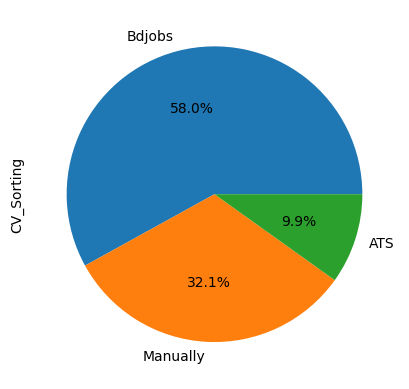

In [166]:
all['CV_Sorting'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: >

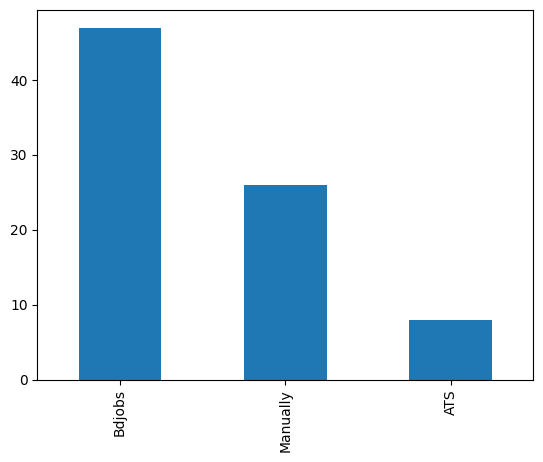

In [169]:
all['CV_Sorting'].value_counts().plot(kind='bar')

In [170]:
all.groupby('Size')['CV_Sorting'].value_counts()

Size    CV_Sorting
Big     Manually      15
        Bdjobs        10
        ATS            4
Medium  Bdjobs        16
        Manually       4
        ATS            1
Small   Bdjobs        21
        Manually       7
        ATS            3
Name: CV_Sorting, dtype: int64

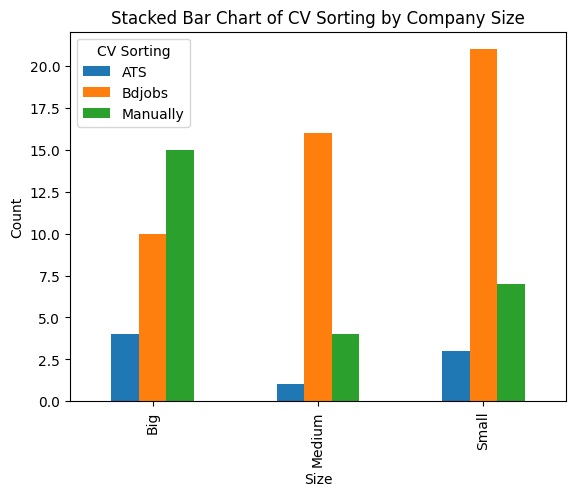

In [182]:
import matplotlib.pyplot as plt

all.groupby('Size')['CV_Sorting'].value_counts().unstack().plot(kind='bar')


plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of CV Sorting by Company Size')
plt.legend(title='CV Sorting')
plt.show()

In [194]:
pd.crosstab(all['Contacted'],all['Difficult'])

Difficult,Confidential,No,Yes
Contacted,,,
No,0,11,2
Yes,1,44,10


In [197]:
import numpy as np
np.log((11/44)/(44/11))

-2.772588722239781

In [198]:
(11/44)/(2/10)

1.25

In [199]:
np.log(1.25)

0.22314355131420976

In [203]:
pd.crosstab(all['Industry'],all['CV_Sorting'])

CV_Sorting
ATS          8
Bdjobs      47
Manually    26
dtype: int64

In [212]:
all['Industry']=all['Industry'].str.split('/').str[0]

Text(0, 0.5, 'Contacted by Sales Contact Person')

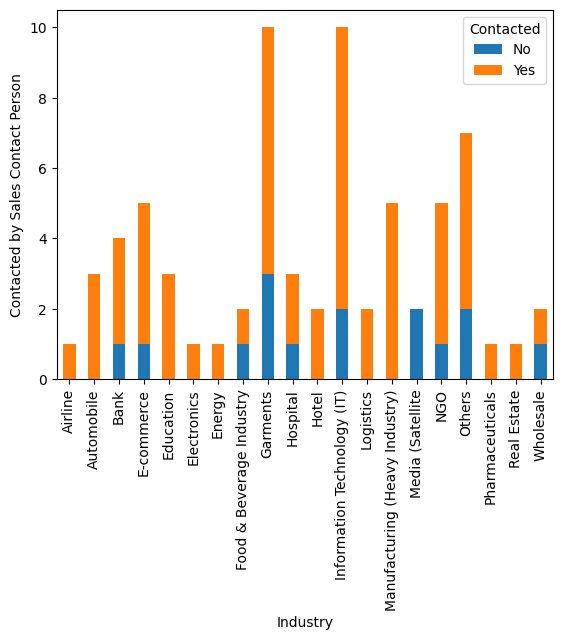

In [219]:
all.groupby('Industry')['Contacted'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.xlabel('Industry')
plt.ylabel('Contacted by Sales Contact Person')


In [220]:
all

,index,Industry,CV_Sorting,Difficult,Contacted,Benefits_AOP,Know_MC,Remark,Size
0,0,Information Technology (IT),Bdjobs,No,Yes,Not Much,Yes,NaN,Small
1,1,Information Technology (IT),Bdjobs,NaN,NaN,NaN,NaN,NaN,Small
2,2,Information Technology (IT),Bdjobs,Yes,Yes,Not Much,No,NaN,Small
3,3,Garments,Manually,Yes,No,Not Much,No,NaN,Small
4,4,Information Technology (IT),Bdjobs,No,Yes,Not Much,No,Can not find appropriate candidate. Had to use...,Small
...,...,...,...,...,...,...,...,...,...
77,129,Hospital,ATS,Yes,Yes,Preference,Yes,matching is not effective,Big
78,130,Manufacturing (Heavy Industry),Bdjobs,No,Yes,No,Yes,NaN,Big
79,133,E-commerce,Manually,No,Yes,Yes,Yes,"matching is easy to sort, less irrelevant appl...",Big
80,137,Others,Manually,No,Yes,Yes,Yes,"Need more suggestive approach ,",Big


In [227]:
cont=pd.crosstab(all[all['CV_Sorting']!='ATS']['CV_Sorting'],all[all['Difficult']!='Confidential']['Difficult'])

In [222]:
(42/13)/(2/9)

14.53846153846154

In [223]:
np.log(14.5)

2.6741486494265287

In [225]:
all[all['CV_Sorting']!='ATS']['CV_Sorting']

0       Bdjobs
1       Bdjobs
2       Bdjobs
3     Manually
4       Bdjobs
        ...   
76    Manually
78      Bdjobs
79    Manually
80    Manually
81    Manually
Name: CV_Sorting, Length: 74, dtype: object

In [228]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(cont)

In [230]:
print(p_value)

0.0007079791172893016


In [232]:
all['Remark'].unique()

array([nan,
       'Can not find appropriate candidate. Had to use other sources because of reduced number of applicants.',
       'Price increased, now using paper advertisement. Now our portal has become harder to navigate.',
       'A notification system from LinkedIn to notify the rejected candidates. Now uses LinkedIn.',
       'Just to store cv, not much use of email',
       'Lack of serious candidates. Not enough candidates attending physical interview.',
       'Physical CV droppers are serious, Online applicants not showing up in physical interview.',
       'Physical CV droppers are serious, Online applicants not showing in physical interview.',
       'Regional contact persons numbers should be made available in the site.',
       'Matching should be improved a lot, and keywords should be made efficient. Non-serious candidates. Also the candidate review system by employer. ',
       'Non-serious candidates, candidate review system',
       'Keyword search,match merchandisin

<Axes: ylabel='Difficult'>

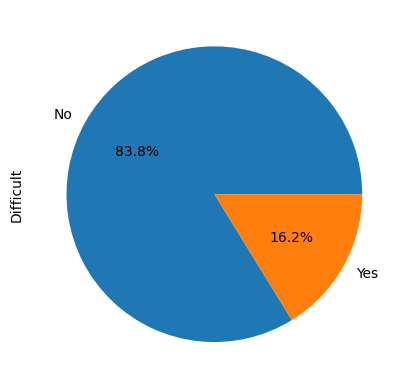

In [235]:
all[all['Difficult']!='Confidential']['Difficult'].value_counts().plot(kind='pie',autopct='%1.1f%%')